### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

digits.data.shape: (1797, 64)
digits.data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
digits.target:
[0 1 2 ... 8 9 8]
digits.images:
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0

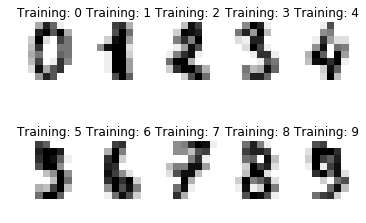

In [2]:
digits = datasets.load_digits()

# print(f"digits:\n{digits}")
print(f"digits.data.shape: {digits.data.shape}")
print(f"digits.data:\n{digits.data}")
print(f"digits.target:\n{digits.target}")
print(f"digits.images:\n{digits.images}")
print(f"digits.DESCR:\n{digits.DESCR}")

images_and_labels = list(zip(digits.images, digits.target))
# print(images_and_labels)
# plot the first 10 samples
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,                  # the image to be plotted
               cmap=plt.cm.gray_r,     # color map
               interpolation='nearest'
              )
    plt.title(f"Training: {label}")
plt.show()


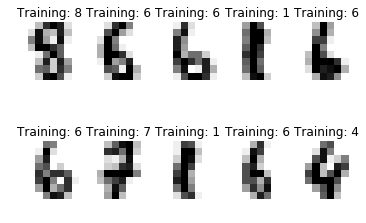

In [3]:
# split into training / test sets
x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, 
                                                                               digits.target, 
                                                                               digits.images, 
                                                                               test_size=0.25, random_state=4)

# plot the first 10 training images
images_and_labels = list(zip(images_train, y_train))
# plot the first 10 samples
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,                  # the image to be plotted
               cmap=plt.cm.gray_r,     # color map
               interpolation='nearest'
              )
    plt.title(f"Training: {label}")
plt.show()


Accuracy: 0.9666666666666667
Feature Importance:
[0.00000000e+00 2.03037431e-03 7.27549625e-03 6.51884508e-03
 1.95937355e-03 5.25424367e-02 1.02452965e-02 3.97688452e-04
 0.00000000e+00 1.86791397e-03 1.09544315e-02 4.62646188e-04
 6.00741621e-03 1.60838301e-02 1.62301913e-03 1.09981953e-03
 1.86680477e-04 3.14808421e-03 1.12193715e-02 3.53462684e-02
 2.49161354e-02 8.95781084e-02 6.73967369e-03 3.12250373e-07
 3.49132736e-04 1.93300837e-03 4.69822279e-02 1.97758556e-02
 3.55227242e-02 2.40350270e-02 8.68621915e-03 4.98589568e-04
 0.00000000e+00 6.10898662e-02 4.87720928e-03 8.63670205e-04
 6.77452702e-02 1.19871275e-02 2.06145995e-02 0.00000000e+00
 0.00000000e+00 8.97050174e-03 8.87013639e-02 6.33291271e-02
 1.06463274e-02 1.88657727e-02 1.53691261e-02 2.34348557e-04
 0.00000000e+00 7.63386505e-04 7.86987183e-03 2.16828887e-02
 1.12616704e-02 1.42279621e-02 2.30398947e-02 8.18308052e-05
 0.00000000e+00 5.83478049e-04 2.93159725e-02 2.20039326e-03
 5.16860175e-02 7.88781254e-03 1.896

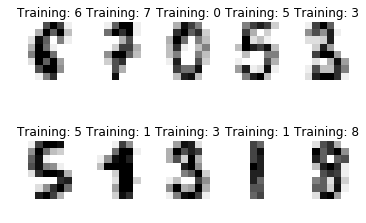

In [4]:
# estabish random forest classificaion model
classifier = GradientBoostingClassifier(loss = 'deviance',    # loss function to be optimized
                                        learning_rate = 0.1,
                                        n_estimators = 100,   # The number of boosting stages to perform
                                        criterion = 'friedman_mse'
                                       )

# train model on training set
classifier.fit(x_train, y_train)

# predict test set
y_pred = classifier.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Feature Importance:\n{classifier.feature_importances_}")


# plot the first 10 test images
images_and_labels = list(zip(images_test, y_test))
# plot the first 10 samples
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,                  # the image to be plotted
               cmap=plt.cm.gray_r,     # color map
               interpolation='nearest'
              )
    plt.title(f"Training: {label}")
plt.show()
